### 导入工具包

In [8]:
import numpy as np
import os
#指定一个随机的种子
np.random.seed(100)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=14)
mpl.rc('ytick',labelsize=14)

import pandas as pd

In [7]:
print (mpl.rc_params())

_internal.classic_mode: False
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: h264
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: None
axes.labelcolor: k
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#946

In [9]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


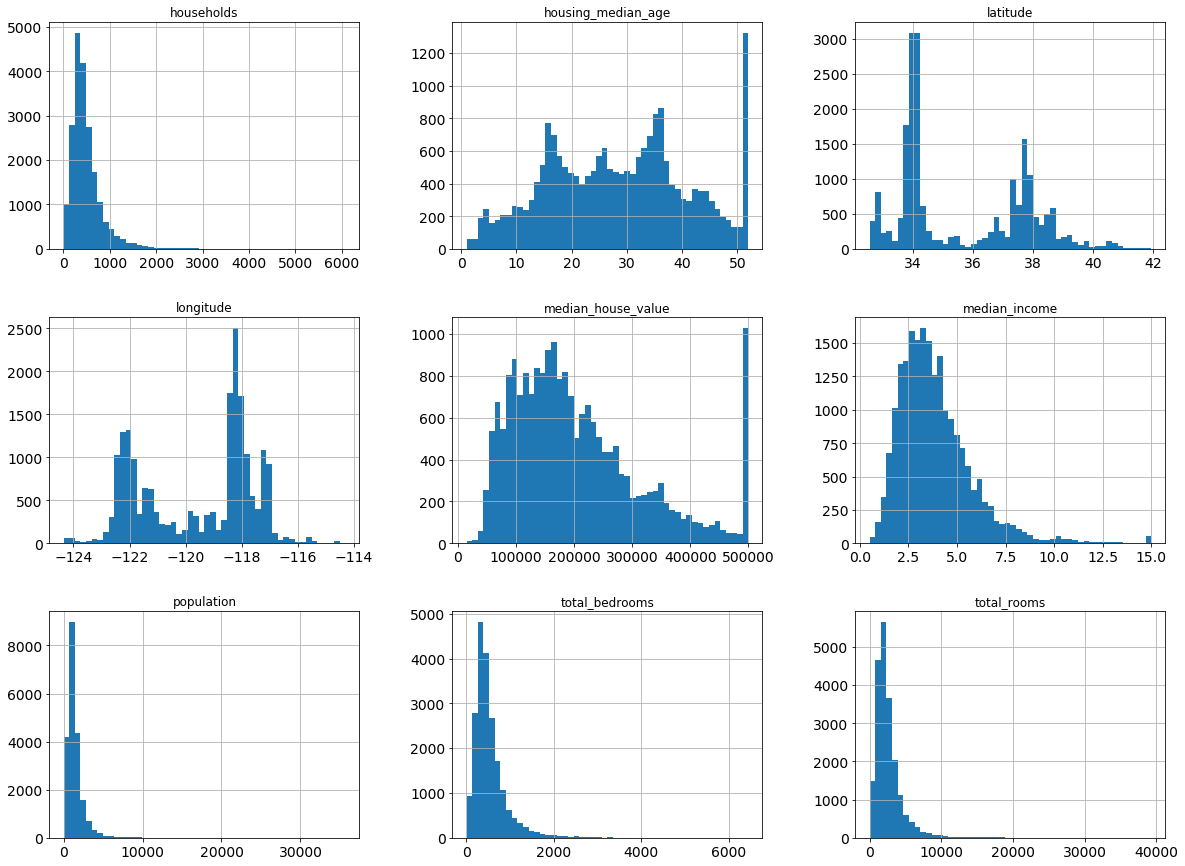

In [14]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set,=train_test_split(housing,test_size = 0.2,random_state=100)

In [17]:
train_set.shape

(16512, 10)

### 连续值离散化

In [18]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])

In [19]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

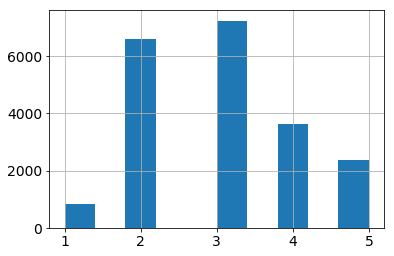

In [20]:
housing['income_cat'].hist()

### 位置情况展示分析

In [21]:
housing = train_set.copy()

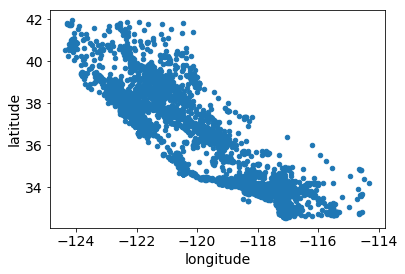

In [22]:
housing.plot(kind='scatter',x='longitude',y='latitude')

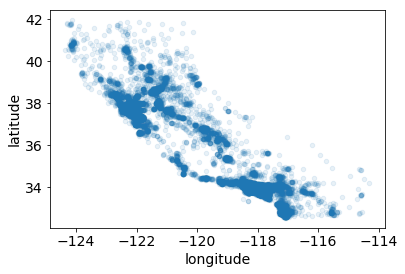

In [23]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

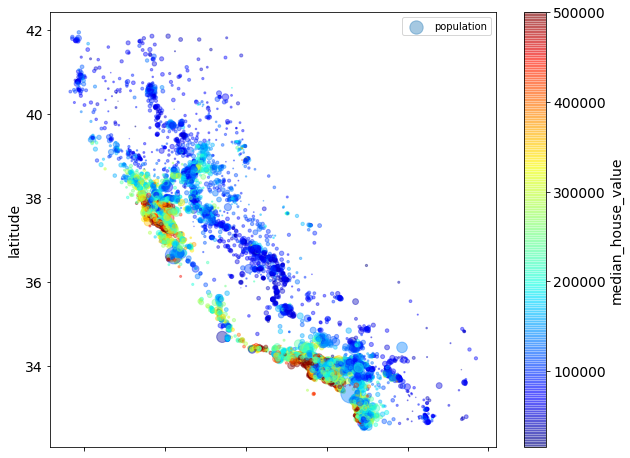

In [25]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label='population',figsize=(10,8),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

### 把坐标位置加载到地图中

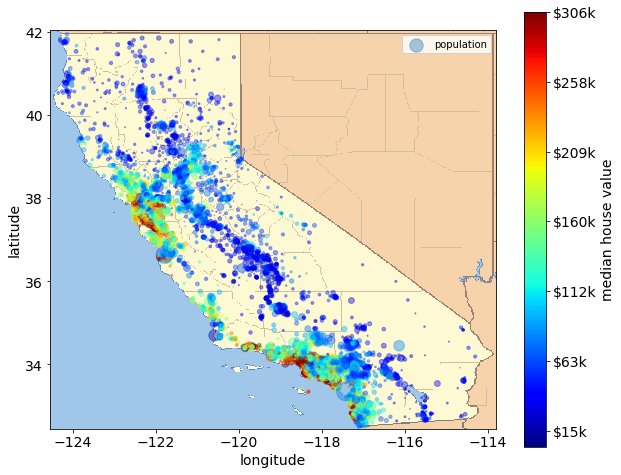

In [34]:
import matplotlib.image as mpimg
california_img = mpimg.imread('california.png')
ax = housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label='population',figsize=(10,8),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=False)
#设置一下坐标的选择区域
plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05],cmap=plt.get_cmap('jet'))
plt.ylabel('latitude')
plt.xlabel('longitude')
price = housing['median_house_value']
tick_values = np.linspace(price.min(),price.max(),11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['$%dk'%(round(v/1000))for v in tick_values])
cbar.set_label('median house value')
plt.legend()
plt.show()

In [29]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.579084,35.638032,28.644501,2646.154191,540.644063,1430.963784,501.959666,3.867024,207155.738433
std,2.007801,2.139614,12.616080,2178.544641,420.553527,1143.747885,382.250256,1.896897,115222.566721
min,-124.350000,32.550000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,297.000000,788.000000,281.000000,2.556800,120100.000000
50%,-118.500000,34.260000,29.000000,2138.500000,438.000000,1172.500000,411.000000,3.539100,180500.000000
75%,-118.010000,37.720000,37.000000,3167.000000,651.000000,1738.000000,608.000000,4.744075,265525.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 特征相关性

In [35]:
corr_matrix = housing.corr()

In [36]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924792,-0.105781,0.041137,0.067619,0.095458,0.052926,-0.022178,-0.051786
latitude,-0.924792,1.000000,0.009945,-0.034474,-0.066470,-0.106345,-0.070479,-0.073860,-0.138945
housing_median_age,-0.105781,0.009945,1.000000,-0.361533,-0.320044,-0.292876,-0.301783,-0.120304,0.104202
total_rooms,0.041137,-0.034474,-0.361533,1.000000,0.929450,0.856229,0.918510,0.197601,0.132195
total_bedrooms,0.067619,-0.066470,-0.320044,0.929450,1.000000,0.874867,0.979860,-0.009886,0.047392
population,0.095458,-0.106345,-0.292876,0.856229,0.874867,1.000000,0.903962,0.005286,-0.025418
households,0.052926,-0.070479,-0.301783,0.918510,0.979860,0.903962,1.000000,0.011480,0.064034
median_income,-0.022178,-0.073860,-0.120304,0.197601,-0.009886,0.005286,0.011480,1.000000,0.684498
median_house_value,-0.051786,-0.138945,0.104202,0.132195,0.047392,-0.025418,0.064034,0.684498,1.000000


In [38]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.684498
total_rooms           0.132195
housing_median_age    0.104202
households            0.064034
total_bedrooms        0.047392
population           -0.025418
longitude            -0.051786
latitude             -0.138945
Name: median_house_value, dtype: float64

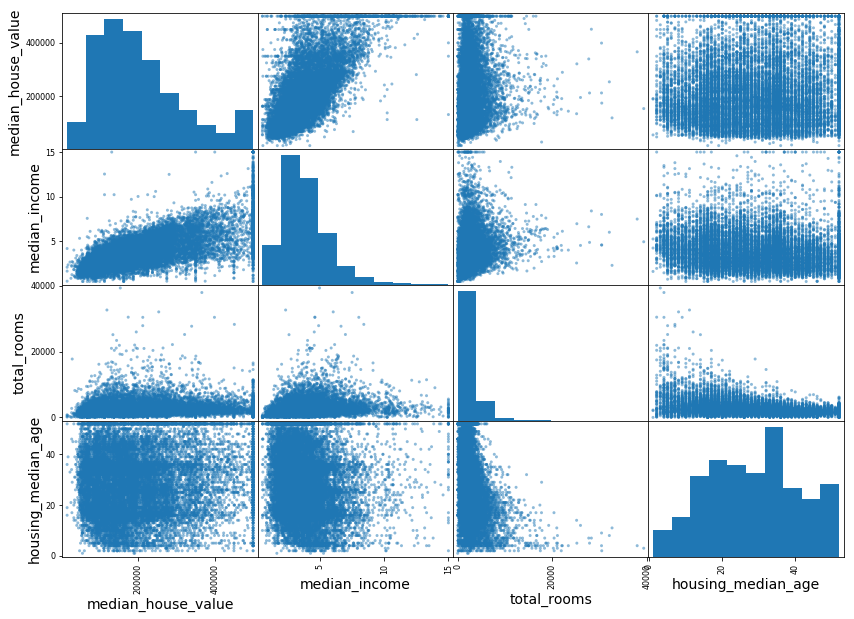

In [42]:
from pandas.plotting import scatter_matrix

atttibutes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[atttibutes],figsize=(14,10))
plt.show()

### 特征构建

In [43]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3278,-122.7,39.14,13.0,532.0,111.0,214.0,62.0,3.3929,108300.0,INLAND


In [44]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [45]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
3278,-122.7,39.14,13.0,532.0,111.0,214.0,62.0,3.3929,108300.0,INLAND,8.580645,0.208647,3.451613


In [46]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.684498
rooms_per_household         0.151993
total_rooms                 0.132195
housing_median_age          0.104202
households                  0.064034
total_bedrooms              0.047392
population_per_household   -0.023074
population                 -0.025418
longitude                  -0.051786
latitude                   -0.138945
bedrooms_per_room          -0.249208
Name: median_house_value, dtype: float64

### 数据预处理

In [51]:
housing = train_set.drop('median_house_value',axis=1)
housing_label = train_set['median_house_value'].copy()

In [56]:
housing.shape

(16512, 9)

##### 缺失值处理

In [58]:
sampe_incomplete_rows = housing[housing.isnull().any(axis=1)]
sampe_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9622,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN
4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,<1H OCEAN
14462,-117.27,32.85,26.0,1373.0,NaN,608.0,268.0,4.4250,NEAR OCEAN
2334,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,INLAND


最好用中位数来进行填充

In [61]:
median = housing['total_bedrooms'].median()
sampe_incomplete_rows['total_bedrooms'].fillna(median,inplace =True)
sampe_incomplete_rows.head()

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9622,-120.32,37.29,38.0,576.0,438.0,478.0,112.0,2.3382,INLAND
10761,-117.87,33.62,8.0,1266.0,438.0,375.0,183.0,9.8020,<1H OCEAN
4852,-118.31,34.03,47.0,1315.0,438.0,785.0,245.0,1.2300,<1H OCEAN
14462,-117.27,32.85,26.0,1373.0,438.0,608.0,268.0,4.4250,NEAR OCEAN
2334,-119.69,36.83,32.0,1098.0,438.0,726.0,224.0,1.4913,INLAND


In [63]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

首先需要剔除掉所有非数值数据

In [64]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [65]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [66]:
imputer.statistics_ 

array([-118.5   ,   34.26  ,   29.    , 2138.5   ,  438.    , 1172.5   ,
        411.    ,    3.5391])

In [68]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2138.5   ,  438.    , 1172.5   ,
        411.    ,    3.5391])

fit完之后使用transform来对指定数据进行预处理操作

In [69]:
X = imputer.transform(housing_num)

In [70]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing.index.values)

In [71]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3278,-122.70,39.14,13.0,532.0,111.0,214.0,62.0,3.3929
16630,-120.83,35.32,11.0,3252.0,701.0,1814.0,660.0,3.2226
18748,-122.31,40.49,18.0,4026.0,718.0,1731.0,705.0,3.3500
14961,-116.92,32.76,7.0,1659.0,237.0,862.0,242.0,5.2741
1740,-122.34,37.97,19.0,2237.0,580.0,1438.0,551.0,2.3382


In [73]:
housing_tr.loc[sampe_incomplete_rows.index.values].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
9622,-120.32,37.29,38.0,576.0,438.0,478.0,112.0,2.3382
10761,-117.87,33.62,8.0,1266.0,438.0,375.0,183.0,9.8020
4852,-118.31,34.03,47.0,1315.0,438.0,785.0,245.0,1.2300
14462,-117.27,32.85,26.0,1373.0,438.0,608.0,268.0,4.4250
2334,-119.69,36.83,32.0,1098.0,438.0,726.0,224.0,1.4913


### 字符特征处理

In [80]:
housing_cat = housing[['ocean_proximity']]

In [83]:
from sklearn.preprocessing import OrdinalEncoder

In [84]:
ordinal_encoder =OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.],
       [3.],
       [0.],
       [4.]])

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
cat_encoder =OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:10].toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [98]:
rooms_ix,bedrooms_ix,population_ix,household_ix = (3,4,5,6)

In [99]:
from sklearn.preprocessing import FunctionTransformer

In [100]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})   

In [101]:
housing_extra_attribs=attr_adder.fit_transform(housing.values)

In [102]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                    columns = list(housing.columns)+['rooms_per_household','population_per_household'])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-122.7,39.14,13,532,111,214,62,3.3929,INLAND,8.58065,3.45161
1,-120.83,35.32,11,3252,701,1814,660,3.2226,NEAR OCEAN,4.92727,2.74848
2,-122.31,40.49,18,4026,718,1731,705,3.35,INLAND,5.71064,2.45532
3,-116.92,32.76,7,1659,237,862,242,5.2741,<1H OCEAN,6.85537,3.56198
4,-122.34,37.97,19,2237,580,1438,551,2.3382,NEAR BAY,4.05989,2.6098


####  使用pipeline来完成一个流水线任务

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('attr_adder',FunctionTransformer(add_extra_features, validate=False)),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [107]:
housing_num_tr[:5]

array([[-1.55444193,  1.63677864, -1.24008206, -0.97047275, -1.02393163,
        -1.06404624, -1.1510077 , -0.24995448,  1.2623194 ,  0.03196482,
        -0.08235568],
       [-0.62304675, -0.14864428, -1.39861471,  0.278105  ,  0.38538347,
         0.33490581,  0.41345981, -0.3397354 , -0.19987443, -0.0293668 ,
         0.02306093],
       [-1.36019374,  2.2677527 , -0.84375045,  0.63339882,  0.42599085,
         0.26233518,  0.5311873 , -0.27257105,  0.11365295, -0.05493871,
        -0.54448789],
       [ 1.32441591, -1.34515806, -1.71568   , -0.45313925, -0.72295926,
        -0.49747066, -0.68009775,  0.74180041,  0.57181112,  0.04159209,
        -1.08557628],
       [-1.37513591,  1.08993444, -0.76448413, -0.18781648,  0.09635444,
         0.00615208,  0.12829768, -0.80598461, -0.54702767, -0.0414638 ,
         0.68968661]])

In [108]:
#不同方式的预处理
from sklearn.compose import ColumnTransformer


In [109]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [110]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [111]:
full_pipline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])
housing_prepared = full_pipline.fit_transform(housing)

In [112]:
housing_prepared[0]

array([-1.55444193,  1.63677864, -1.24008206, -0.97047275, -1.02393163,
       -1.06404624, -1.1510077 , -0.24995448,  1.2623194 ,  0.03196482,
       -0.08235568,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

### 选择算法模型

In [113]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
input_data = housing[:5]
input_label = housing_label[:5]
input_data_prepared = full_pipline.transform(input_data)
lin_reg.predict(input_data_prepared)

array([139358.29493625, 226995.79803492, 106676.20253611, 234274.09491695,
       170058.7099984 ])

In [117]:
input_label.values

array([108300., 183200., 118400., 249400., 120700.])

In [119]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_label,housing_predictions)
np.sqrt(mse)

68663.20396012595